<a href="https://colab.research.google.com/github/PiyushGithub24/MACHINE_LEARNING_BY_PIYUSH_KUMAR/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Polynomial Regression :--

In [109]:
#Importing the dependencies :--
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [110]:
X=6*np.random.rand(200,1)-3
y=0.8 *(X**2) + 0.9 * X + 2+ np.random.randn(200,1)

#y=0.8*X^2 + 0.9*X +2

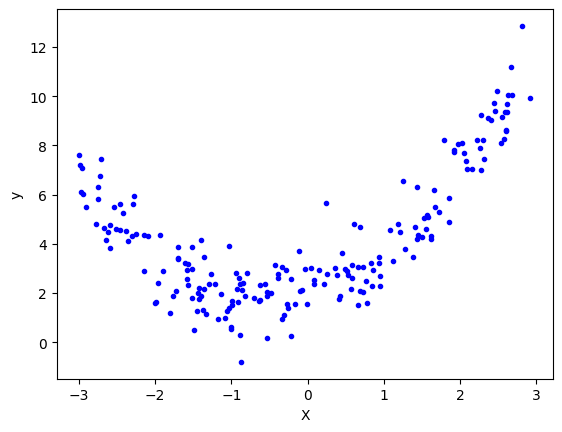

In [111]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [113]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [114]:
y_pred=lr.predict(X_test)

In [115]:
r2_score(y_test,y_pred)

-0.10934588515248089

In [116]:
X_train.shape,y_train.shape

((160, 1), (160, 1))

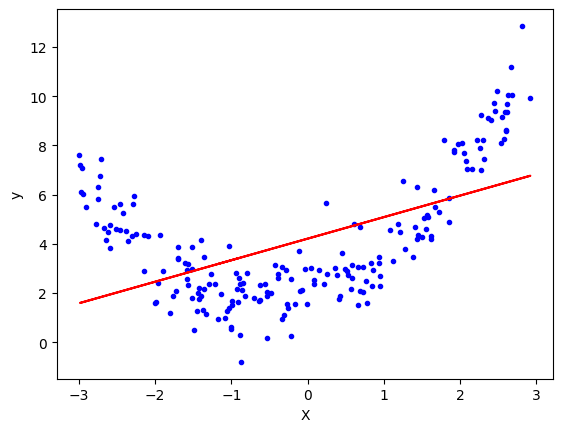

In [117]:
plt.plot(X,y,'b.')
plt.plot(X_train,lr.predict(X_train),'r')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

#Lets apply polynomial Linear Regression:-

In [118]:
#With Degree=2
poly=PolynomialFeatures(degree=2,include_bias=True)  #include bias parameter
X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.transform(X_test)

In [119]:
X_train_trans.shape ,X_train.shape

((160, 3), (160, 1))

In [120]:
print(X_train[0])
print(X_train_trans[0])

[-1.17031737]
[ 1.         -1.17031737  1.36964274]


In [121]:
lr1=LinearRegression()
lr1.fit(X_train_trans,y_train)

LinearRegression()

In [122]:
y_pred1=lr1.predict(X_test_trans)

In [123]:
r2_score(y_test,y_pred1)

0.8247262885728094

In [124]:
lr1.coef_

array([[0.        , 0.88083312, 0.79435987]])

In [125]:
lr1.intercept_

array([1.96975154])

###we can relate coef_ and intercept_ with y=0.8*X^2 + 0.9*X +2

In [126]:
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_trans=poly.transform(X_new)
y_new=lr1.predict(X_new_trans)

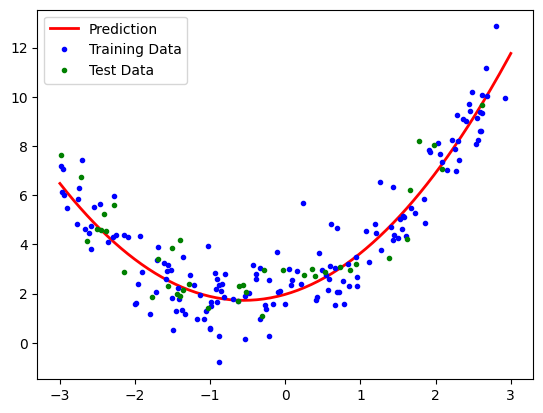

In [127]:
plt.plot(X_new,y_new,'r-',linewidth=2,label='Prediction')
plt.plot(X_train,y_train,'b.',label='Training Data')
plt.plot(X_test,y_test,'g.',label='Test Data')
plt.legend()
plt.show()

In [128]:
def polynomial_regression(degree):
  X_new=np.linspace(-3,3,100).reshape(100,1)
  X_new_poly=poly.transform(X_new)

  polybig_features=PolynomialFeatures(degree=degree,include_bias=True)
  std_scaler=StandardScaler()
  lin_reg=LinearRegression()

  polynomial_regression=Pipeline([
      ('poly_features',polybig_features),
      ('std_scaler',std_scaler),
      ('lin_reg',lin_reg)
  ])

  polynomial_regression.fit(X,y)
  y_newbig=polynomial_regression.predict(X_new)

  plt.plot(X_new,y_newbig,'r-',linewidth=2,label='Degree :'+str(degree))
  plt.plot(X_train,y_train,'b.',label='Training Data')
  plt.plot(X_test,y_test,'g.',label='Test Data')
  plt.legend(loc='upper left')
  plt.axis([-3,3,0,10])
  plt.show()


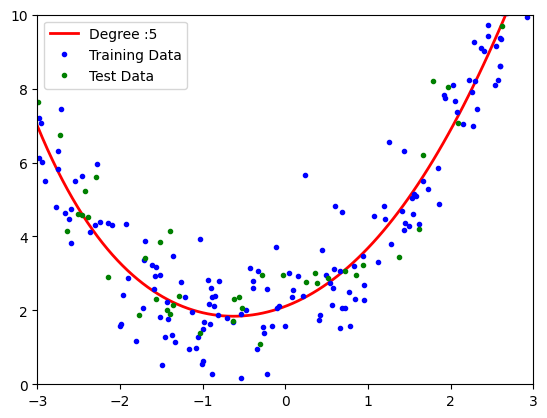

In [129]:
polynomial_regression(5)

##3D polynomial Regression :-

In [130]:
X=7*np.random.rand(100,1) - 2.8
y=7*np.random.rand(100,1) - 2.8

z=X**2 + y**2 + 0.2*X + 0.2*y +0.1*X*y + 2 + np.random.randn(100,1)
#z=X**2 + y**2 + 0.2*X + 0.2*y +0.1*X*y + 2

In [131]:
import plotly.express as px
df=px.data.iris()
fig=px.scatter_3d(df,x=X.ravel(),y=y.ravel(),z=z.ravel())
fig.show()

In [138]:
lr=LinearRegression()
lr.fit(np.array([X,y]).reshape(100,2),z)

x_input=np.linspace(X.min(),X.max(),10)
y_input=np.linspace(y.min(),y.max(),10)

xGrid ,yGrid=np.meshgrid(x_input,y_input)
final=np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
z_final=lr.predict(final).reshape(10,10)

In [139]:
import plotly.graph_objects as go
fig=px.scatter_3d(x=X.ravel(),y=y.ravel(),z=z.ravel())
fig.add_trace(go.Surface(x=x_input , y=y_input ,z=z_final))
fig.show()

In [140]:
X_multi=np.array([X,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [163]:
poly=PolynomialFeatures(degree=6)

In [164]:
X_multi_trans=poly.fit_transform(X_multi)

In [165]:
print("Inputs :",poly.n_features_in_)
print("Outputs :",poly.n_output_features_)
print("powers :\n",poly.powers_)

Inputs : 2
Outputs : 28
powers :
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]
 [4 0]
 [3 1]
 [2 2]
 [1 3]
 [0 4]
 [5 0]
 [4 1]
 [3 2]
 [2 3]
 [1 4]
 [0 5]
 [6 0]
 [5 1]
 [4 2]
 [3 3]
 [2 4]
 [1 5]
 [0 6]]


In [166]:
X_multi_trans.shape

(100, 28)

In [167]:
lr=LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [168]:
X_test_multi=poly.transform(final)

In [169]:
z_final=lr.predict(X_test_multi).reshape(10,10)

In [170]:
# import plotly.graph_objects as go
fig=px.scatter_3d(x=X.ravel(),y=y.ravel(),z=z.ravel())
fig.add_trace(go.Surface(x=x_input , y=y_input ,z=z_final))
fig.update_layout(scene=dict(zaxis=dict(range=[0,35])))
fig.show()